# Домашнее задание № 1

Вам необходимо провести анализ и подготовить данные.

# Исходные данные

Ознакомьтесь с данными в [источнике](https://www.kaggle.com/uciml/student-alcohol-consumption?select=student-por.csv):

Если вкратце, то у вас есть 29 параметров и одна целевая переменная G3.

In [107]:
import pandas as pd
import numpy as np

import scipy.stats as st

import seaborn as sns
import matplotlib.pyplot as plt

In [108]:
# Читаем данные

X_initial = pd.read_csv('train_features_with_answers.csv')

In [109]:
# Про характеристики прочитайте в источнике

X_initial.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,MS,M,NaN,U,LE3,T,1,3,at_home,services,...,yes,yes,4,3,3,2,3,3,0,9
1,GP,M,NaN,R,LE3,T,3,3,teacher,other,...,yes,no,3,3,4,3,5,3,16,12
2,GP,M,15.0,NaN,GT3,T,3,4,other,other,...,yes,no,5,5,1,1,1,5,0,13
3,MS,M,17.0,R,GT3,T,4,3,services,other,...,yes,yes,4,5,5,1,3,2,4,11
4,GP,F,20.0,R,GT3,T,2,1,other,other,...,yes,yes,1,2,3,1,2,2,8,12


# Часть 1. Визуальный анализ данных (Exploratory Data Analysis)

Перед тем, как приступать к построению алгоритмов, необходимо понять данные, с которыми требуется работать. Для этого в подходах к построению алгоритмов машинного обучения выделят специальный этап - Разведочный анализ данных или Exploratory Data Analysis (EDA). EDA в себя включает все те, что касается описания данных: визуализацию, интерпретацию и анализ. 

Прежде всего сделаем визуализацию данных для того, чтобы оценить диапазоны значений и виды их распределений.

Постройте для приведенных ниже характеристик следующие виды графиков:
- Гистограммы;
- Круговые диаграмм;
- Графики;
- Таблицы;
- 3D диаграммы.

Выберите наиболее подходящий тип графика для каждой характеристки. 

__Основной критерий оценивания__ - читаемость и интерпретируемость данных.

## Характеристика: "Sex"

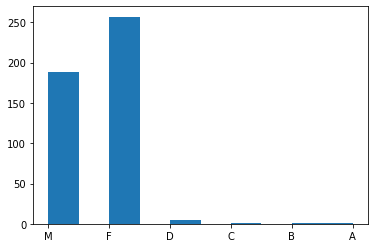

In [123]:
df = X_initial.copy()
plt.hist(df['sex'])
None

## Характеристика: "Age"

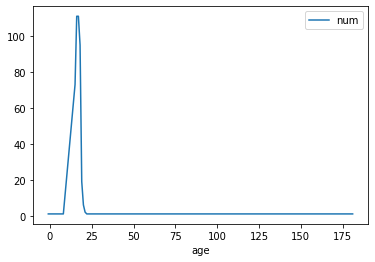

In [124]:
df = X_initial.copy()
df['num'] = 1
df = pd.pivot_table(df, index='age',  aggfunc='count')
df.plot(y = 'num')
None

## Характеристика: "Weekly study time"

In [125]:
df = X_initial.copy()
df['studytime'].unique()
None

In [113]:
def get_study_time(category):
    return {
         category == 1:  '<2 hours',
         category == 2:  '2 - 2 to 5 hours',
         category == 3:  '3 - 5 to 10 hours',
         category == 4:  '4 - >10 hours',
    }[True]

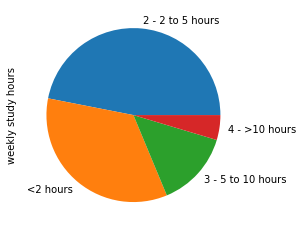

In [126]:
df['weekly study hours'] = df['studytime'].fillna(0).apply(lambda x: get_study_time(x))
df['weekly study hours'].value_counts().plot.pie()
None

## Характеристика: "Romantic Relationship"

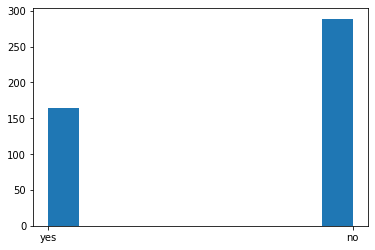

In [127]:
df = X_initial.copy()
plt.hist(df['romantic'])
None

## Характеристика: "Alcohol Consumption"

In [116]:
df = X_initial.copy()

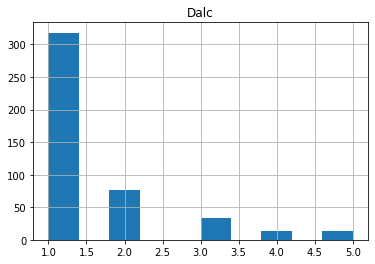

In [128]:
df.hist(column='Dalc')
None

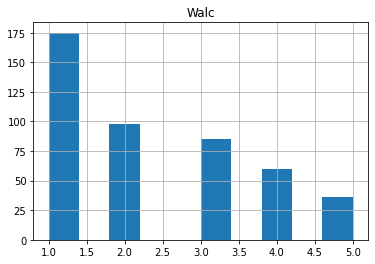

In [129]:
df.hist(column='Walc')
None

## prettier

In [119]:
df = X_initial.copy()

In [120]:
def get_alc_time(category):
    return {
         category == 1:  'easy',
         category == 2:  'low',
         category == 3:  'medium',
         category == 4:  'hard',
        category == 5:  'death',

    }[True]

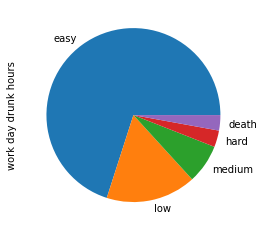

In [130]:
df['work day drunk hours'] = df['Dalc'].fillna(0).apply(lambda x: get_alc_time(x))
df['work day drunk hours'].value_counts().plot.pie()
None

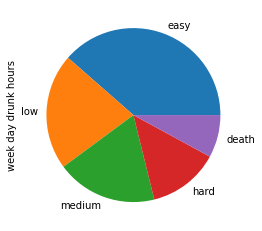

In [131]:
df['week day drunk hours'] = df['Walc'].fillna(0).apply(lambda x: get_alc_time(x))
df['week day drunk hours'].value_counts().plot.pie()
None

## Целевая зависимость: "G3" (Final Grade)

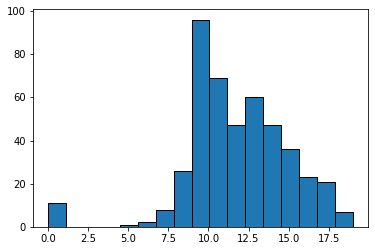

In [132]:
df = X_initial.copy()
df['G3'].unique()
plt.hist(df['G3'],bins = len(df['G3'].unique()),edgecolor='black')
None

## Прочие характеристики

Прочитайте описание данных на [сайте](https://www.kaggle.com/uciml/student-alcohol-consumption) и подумайте, какие еще характеристики было бы полезно проанализировать. Постройте соответсвующие графики для выбранных характеристик.

Постройте графики еще для минимум 4 характеристик: числовая (2) и категориальная (2), применив хотя бы один раз:
- pieplot
- boxplot
- violinplot

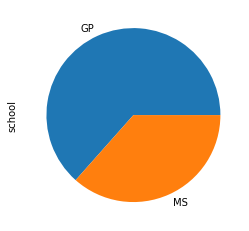

In [133]:
df = X_initial.copy()
df['school'].value_counts().plot.pie()
None

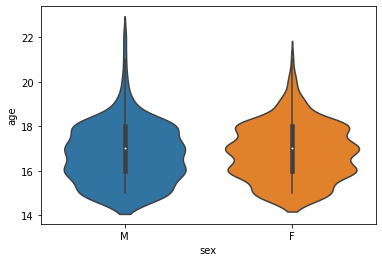

In [134]:
df = X_initial.copy()
sns.violinplot(data=df[((df['sex']=='F') | (df['sex']=='M')) & (df['age']<100) & (df['age']>10)], x="sex", y="age")
None

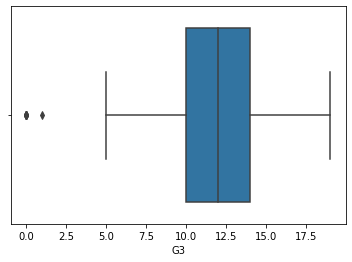

In [135]:
df = X_initial.copy()
sns.boxplot(x=df["G3"])
None

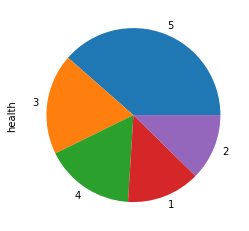

In [136]:
df = X_initial.copy()
df['health'].value_counts().plot.pie()
None

## Корреляция признаков

Для того, чтобы быстро получить оценку о взаимосвязи признаков целесообразно построить матрицу их корреляции. Постройте матрицу корреляции.

In [137]:
df = X_initial.copy()
df.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G3
age,1.000000,0.017118,0.015926,-0.045215,0.037509,-0.000269,0.050729,-0.048159,-0.019423,-0.033190,-0.038725,-0.105574,-0.026602,-0.031453
Medu,0.017118,1.000000,0.650052,-0.292153,0.088940,-0.172137,0.068827,0.029327,0.055263,-0.011133,-0.021110,0.045795,0.018881,0.207645
Fedu,0.015926,0.650052,1.000000,-0.211014,0.077986,-0.157411,0.086715,0.032968,0.062423,-0.002507,-0.001616,0.086325,0.047975,0.196666
traveltime,-0.045215,-0.292153,-0.211014,1.000000,-0.084222,0.079322,-0.025235,0.003360,0.008395,0.078637,0.048305,-0.047959,-0.041817,-0.150548
studytime,0.037509,0.088940,0.077986,-0.084222,1.000000,-0.125199,-0.024362,-0.075368,-0.098676,-0.152659,-0.243818,-0.052498,-0.099545,0.217938
failures,-0.000269,-0.172137,-0.157411,0.079322,-0.125199,1.000000,-0.064462,0.112960,0.052652,0.153152,0.135870,0.045039,0.121685,-0.407549
famrel,0.050729,0.068827,0.086715,-0.025235,-0.024362,-0.064462,1.000000,0.113157,0.070991,-0.052349,-0.075185,0.111193,-0.117433,0.087383
freetime,-0.048159,0.029327,0.032968,0.003360,-0.075368,0.112960,0.113157,1.000000,0.359857,0.110431,0.166500,0.109172,-0.000584,-0.093619
goout,-0.019423,0.055263,0.062423,0.008395,-0.098676,0.052652,0.070991,0.359857,1.000000,0.241739,0.421281,-0.008693,0.059189,-0.090558
Dalc,-0.033190,-0.011133,-0.002507,0.078637,-0.152659,0.153152,-0.052349,0.110431,0.241739,1.000000,0.613398,0.063682,0.217312,-0.233310


## Посчитайте корреляцию Спирмана и нарисуйте ее в виде тепловой карты

<AxesSubplot:>

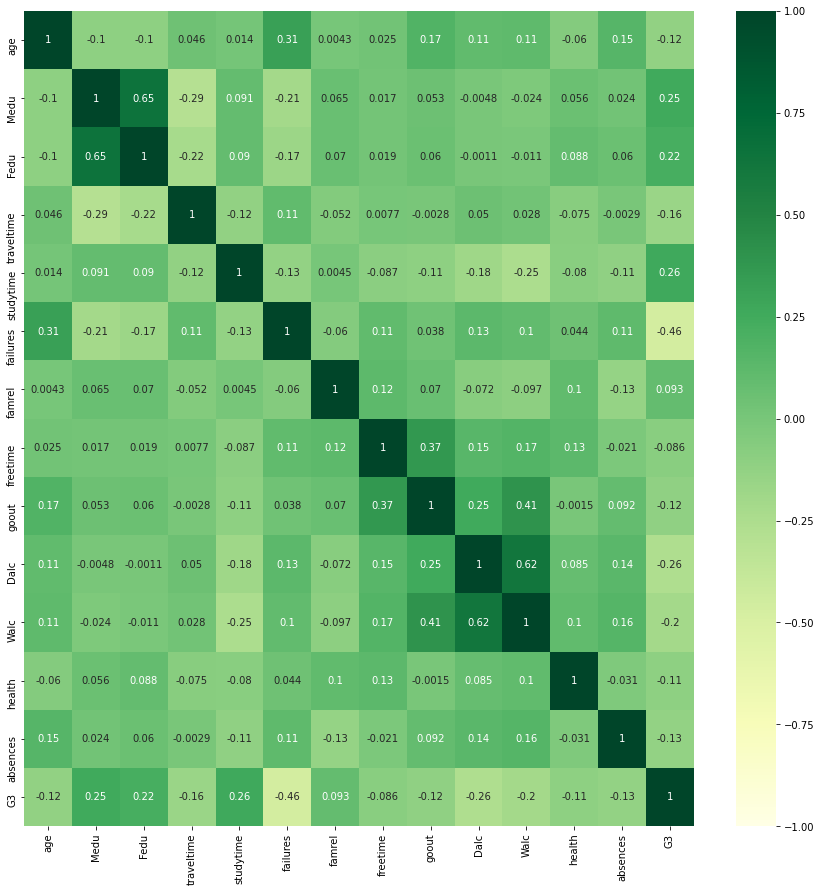

In [138]:
df = X_initial.copy()
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(df.corr(method='spearman'), 
         vmin=-1, vmax=1,annot=True,cmap="YlGn",ax=ax)

## Диапазон значений характеристик

Посчитайте число уникальных значений для каждого признака и сравните их между собой.

In [140]:
df = X_initial.copy()
df_counts = pd.DataFrame(df.nunique(), columns ={'count'})
df_counts.sort_values(by=df_counts.columns[0])

,count
school,2
romantic,2
internet,2
higher,2
nursery,2
activities,2
paid,2
famsup,2
schoolsup,2
famsize,2


## Найдите соотношение мужского и женского пола для самых выскоих оценок (G3) из датасета, у которых время на дорогу больше, чем 30 минут. Нарисуйте это соотношение на круговой диаграмме

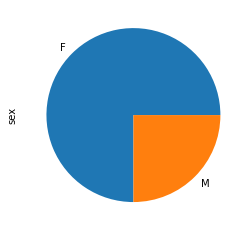

In [141]:
df = X_initial.copy()
low_of_higher = 15
df[((df['sex']=='F') | (df['sex']=='M')) & (df['G3']>low_of_higher) & (df['traveltime']>=3)]['sex'].value_counts().plot.pie()
None

## Построить boxplot для оценок по возрасту.  

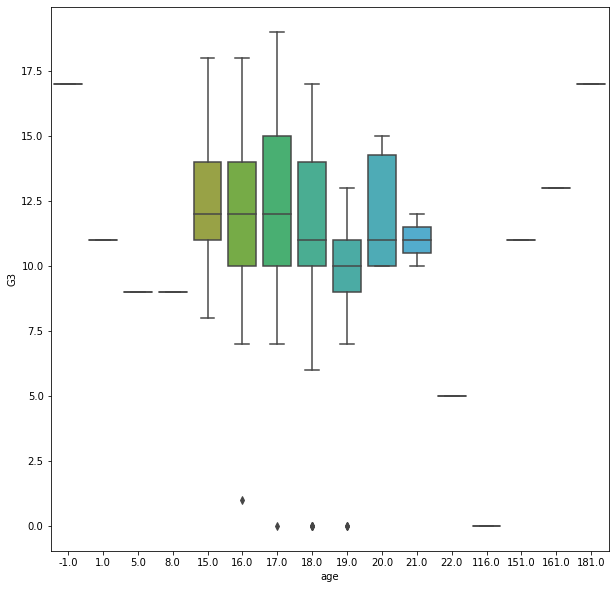

In [142]:
df = X_initial.copy()
fig, ax = plt.subplots(figsize=(10,10)) 
sns.boxplot(y=df["G3"], x = df["age"], ax=ax)
None

## Найти id топ-5 самых юных отличников. 

In [27]:
df = X_initial.copy().sort_values(by =['age'])
df[df['G3']>17].head().index

Int64Index([109, 151, 294, 221, 74], dtype='int64')

## Для каждого возраста найдите максимальную и минимальную оценку (G3)

In [28]:
df = X_initial.copy()
ages=df['age'].unique()
maxG = [df[df['age'] == age]['G3'].max() for age in ages]
minG = [df[df['age'] == age]['G3'].min() for age in ages]
max_min_G3 = list(zip(ages,minG,maxG))
df = pd.DataFrame(max_min_G3,columns = ['age','min','maxG3'])
df

,age,min,maxG3
0,NaN,NaN,NaN
1,15.0,8.0,18.0
2,17.0,0.0,19.0
3,20.0,10.0,15.0
4,18.0,0.0,17.0
5,16.0,1.0,18.0
6,19.0,0.0,13.0
7,161.0,13.0,13.0
8,181.0,17.0,17.0
9,151.0,11.0,11.0


# Часть 2. Предобработка данных

Теперь перейдем к подготовке данных для моделей машинного обучения. Не все из описанного ниже нужно делать. Подумайте.

In [164]:
df = X_initial.copy()
pd.DataFrame(df.apply(lambda col: col.unique()), columns = ['unique'])

,unique
school,"[MS, GP]"
sex,"[M, F, D, C, B, A]"
age,"[nan, 15.0, 17.0, 20.0, 18.0, 16.0, 19.0, 161...."
address,"[U, R, nan]"
famsize,"[LE3, GT3]"
Pstatus,"[T, A]"
Medu,"[1, 3, 4, 2, 0]"
Fedu,"[3, 4, 1, 2, 0]"
Mjob,"[at_home, teacher, other, services, health]"
Fjob,"[services, other, at_home, teacher, health]"


## Найдите и исправьте ошибки в данных

## Заполните пропуски в данных

Заполнить пропуски в данных можно одним из следующи способов или разными для разных признаков:
- Заполнить нулями
- Выбросить данные с нулями (не рекомендуется)
- Заполнить средним для данного параметра
- Заполнить наиболее соответствующим данному прецеденту (рекомендуется)

In [147]:
def is_correct(feat_name, feat_val):
    if feat_name == 'sex':
        return False if feat_val in "ABCD" else True
            
    elif feat_name == 'address':
        return False if feat_val is None else True
            
    elif feat_name == 'age': # min student age is 7
        return False if (feat_val < 7 or feat_val > 90 or feat_val is None) else True

    return True


In [148]:
def best_match(arg, feat_name,  df)->int:
    
    index = 0
    max_match = -1
    for i in range(df.shape[0]):
        if i != arg and (df.iloc[arg] == df.iloc[i]).values.sum() > max_match and df.iloc[i].notnull().all() and is_correct(feat_name, df.iloc[i][feat_name]):
            max_match = (df.iloc[arg] == df.iloc[i]).values.sum()
            index = i
    return index

In [149]:
def wrong_feats(i, df)->list:
    wrong_feats_l = []
    for col in df.columns:
        if not is_correct(col, df.iloc[i][col]):
            wrong_feats_l.append(col)
                
    return wrong_feats_l 

## NaN defeating

In [150]:
for i in df[df.isnull().any(1)].index:
    for feat_name in  df.columns[df.iloc[i].isna()].tolist():
        df.loc[i, feat_name] = df.loc[best_match(i, feat_name, df), feat_name]

## wrong sex or age defeating

In [151]:
for i in df[(df['age']>100) | (df['age'] < 10) | ((df['sex'] != 'F') & (df['sex'] != 'M')) ].index:
    for feat_name in wrong_feats(i, df):
        df.loc[i, feat_name] = df.loc[best_match(i, feat_name, df), feat_name]

## Закодируйте категориальные признаки

In [152]:
df = pd.get_dummies(df)

## Придумайте сложные признаки

Сложные признаки - это комбинации существующих (линейных или нелинейных).
Это нужно для того, чтобы самостоятельно добавить нелинейность в алгоритм.

Приведите не менее двух признаков.

In [153]:
df['DalcWalc'] = df['Dalc'] * df['Walc']
df['HealthWalc'] = df['health'] * df['Walc']
df['HealthDalc'] = df['Dalc'] * df['health']

## Удалите скоррелированные данные

In [154]:
cor_matrix = df.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
df = df.drop(df[to_drop], axis=1)

In [163]:
pd.DataFrame(df.apply(lambda col: col.unique()), columns = ['unique'])

,unique
age,"[18.0, 15.0, 17.0, 20.0, 16.0, 19.0, 21.0, 22...."
Medu,"[1, 3, 4, 2, 0]"
Fedu,"[3, 4, 1, 2, 0]"
traveltime,"[1, 3, 2, 4]"
studytime,"[1, 2, 3, 4]"
failures,"[0, 1, 2, 3]"
famrel,"[4, 3, 5, 1, 2]"
freetime,"[3, 5, 2, 1, 4]"
goout,"[3, 4, 1, 5, 2]"
Dalc,"[2, 3, 1, 5, 4]"


# Часть 3. Стратегия валидации

Итак, у вас есть данные для обучения и данные, на которых необходимо сделать предсказание. Для оценки точности необходимо проводить валидацию (так как мало данных, можно проводить кросс валидацию).
Валидацию проще всего реализовать методами sklearn, например:
- KFold
- ShuffleSplit
- StratifiedKFold
- StratifiedShuffleSplit
- GroupKFold
- GroupShuffleSplit

In [165]:
from sklearn.model_selection import ShuffleSplit, KFold, GroupKFold, StratifiedKFold
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import naive_bayes

In [166]:
to_drop_name = 'G3'

In [167]:
X = df.copy()
y = X[to_drop_name]
X = X.drop(to_drop_name, axis = 1)

In [168]:
clf = KNeighborsClassifier(6) # По умочанию - 5 соседей и Евклидова метрика

In [169]:
cv = StratifiedKFold(n_splits=5)

In [170]:
cross_val_score(clf, X, y, cv=cv)

array([nan, nan, nan, nan, nan])

# Часть 4. Заполнение пропусков в данных 

## Фильтрация по диапазону значений 

Проверьте, что все характеристики принадлежат тому диапазону значений, который приведен в описании к исходным данным. Например, если в графе "Пол" есть значение FF, P или -1, то это явная ошибка заполнения.

Приведите данные в соответствии с описанием данных. Если значение указано неверно - укажите ```NaN```.

## Адаптивное заполнения пропусков 

Реализуйте стратегию заполнения пропусков данных на основе схожих примеров. Обучите один из известных вам алгоритмов (knn, Naive Bayes, linear regression) для предсказания той характеристики, пропуски которой присутсвуют в данных. В качестве характеристики для обучения алгоритмов __нельзя__ использовать ```G3```.

#  knn 

In [171]:
pd.options.mode.chained_assignment = None  # default='warn'

In [172]:
df = X_initial.copy()

def divide_df(df):
    df_wrong = df[(df['age']>100) | (df['age'] < 10) | ((df['sex'] != 'F') & (df['sex'] != 'M')) | (df.isnull().any(1))]
    df_wrong['sex'] = df_wrong['sex'].astype('category').cat.codes
    df_wrong['address'] = df_wrong['address'].astype('category').cat.codes
    df_wrong = pd.get_dummies(df_wrong.fillna(0))

    df_right = df[~((df['age']>100) | (df['age'] < 10) | ((df['sex'] != 'F') & (df['sex'] != 'M')) | (df.isnull().any(1)))]
    df_right['sex'] = df_right['sex'].astype('category').cat.codes
    df_right['address'] = df_right['address'].astype('category').cat.codes
    df_right = pd.get_dummies(df_right.fillna(0))
    return df_wrong, df_right

In [173]:
df_wrong, df_right = divide_df(df)
df_wrong.head()

,sex,age,address,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,5,0.0,1,1,3,1,1,0,4,3,...,1,0,0,1,1,0,0,1,0,1
1,5,0.0,0,3,3,3,1,0,3,3,...,0,1,0,1,0,1,0,1,1,0
2,5,15.0,-1,3,4,1,2,0,5,5,...,0,1,0,1,0,1,0,1,1,0
10,5,15.0,-1,4,1,1,2,0,5,3,...,0,1,0,1,0,1,0,1,1,0
20,4,0.0,0,2,3,2,2,0,3,3,...,0,1,0,1,0,1,0,1,1,0


In [174]:
def repair_df(algorythm, df_wrong, df_right, feats):
    for feat in feats:
        X = df_right.drop([feat],axis = 1)
        y = df_right[feat]
        algorythm.fit(X, y)
        prediction = algorythm.predict(df_wrong[X.columns])
        df_wrong[feat] =prediction

In [175]:
repair_df(KNeighborsClassifier(), df_wrong, df_right, ['address', 'age', 'sex'])

In [176]:
df_wrong.head()

,sex,age,address,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,0,18.0,0,1,3,1,1,0,4,3,...,1,0,0,1,1,0,0,1,0,1
1,1,17.0,1,3,3,3,1,0,3,3,...,0,1,0,1,0,1,0,1,1,0
2,1,15.0,1,3,4,1,2,0,5,5,...,0,1,0,1,0,1,0,1,1,0
10,0,15.0,1,4,1,1,2,0,5,3,...,0,1,0,1,0,1,0,1,1,0
20,0,15.0,1,2,3,2,2,0,3,3,...,0,1,0,1,0,1,0,1,1,0


In [177]:
repair_df(KNeighborsClassifier(), df_wrong, df_right, ['address', 'age', 'sex'])

In [178]:
df_wrong.head()

,sex,age,address,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,0,18.0,0,1,3,1,1,0,4,3,...,1,0,0,1,1,0,0,1,0,1
1,1,17.0,1,3,3,3,1,0,3,3,...,0,1,0,1,0,1,0,1,1,0
2,1,15.0,1,3,4,1,2,0,5,5,...,0,1,0,1,0,1,0,1,1,0
10,1,16.0,1,4,1,1,2,0,5,3,...,0,1,0,1,0,1,0,1,1,0
20,0,17.0,0,2,3,2,2,0,3,3,...,0,1,0,1,0,1,0,1,1,0


In [179]:
df = pd.concat([df_wrong, df_right]).sort_index()

# Naive Bayes

In [180]:
from sklearn import naive_bayes

In [181]:
df = X_initial.copy()
df_wrong, df_right = divide_df(df)

In [182]:
repair_df(naive_bayes.GaussianNB(), df_wrong, df_right, ['address', 'age', 'sex'])
df = pd.concat([df_wrong, df_right]).sort_index()


# Linear Regression

In [183]:
from sklearn.linear_model import LinearRegression

In [184]:
df = X_initial.copy()
df_wrong, df_right = divide_df(df)

In [185]:
repair_df(LinearRegression(), df_wrong, df_right, ['address', 'age', 'sex'])
df = pd.concat([df_wrong, df_right]).sort_index()
df = df.astype('int')

# now let's assume that current df is best, so we have to drop correlated data

In [186]:
cor_matrix = df.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
df = df.drop(df[to_drop], axis=1)

In [188]:
df.head()

,sex,age,address,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,...,guardian_mother,guardian_other,schoolsup_no,famsup_no,paid_no,activities_no,nursery_no,higher_no,internet_no,romantic_no
0,0,16,0,1,3,1,1,0,4,3,...,1,0,1,1,1,1,0,1,0,0
1,1,14,0,3,3,3,1,0,3,3,...,0,0,1,0,1,0,0,0,0,1
2,0,14,0,3,4,1,2,0,5,5,...,1,0,1,0,1,0,0,0,0,1
3,1,17,0,4,3,2,2,1,4,5,...,1,0,1,0,0,0,1,0,0,0
4,0,20,0,2,1,2,2,0,1,2,...,0,1,1,0,0,0,0,1,0,0


# Часть 5. Обучение алгоритма

Целевая переменная принимает дискретные значения [0; 20], поэтому вы можете поставить как задачу классификации, так и задачу регрессии.

!Не забудьте про оптимизацию параметров алгоритмов, у вас же уже есть данные для валидации.

In [189]:
from sklearn.metrics import mean_absolute_error as mae

In [190]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn import svm

import warnings
warnings.filterwarnings("ignore")

In [191]:
init_scores = {}

## KNN

In [192]:
to_drop_name = 'G3'
X = df.copy()
y = X[to_drop_name]
X = X.drop(to_drop_name, axis = 1)

In [193]:
cv = StratifiedKFold(n_splits=50)

parameters = {'n_neighbors':range(1, 100)}
knn = KNeighborsClassifier()

grid = GridSearchCV(estimator=knn,
             param_grid=parameters, cv = cv)
grid=grid.fit(X, y)
grid.score(X, y)

# grid_search.score
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']].sort_values(by='mean_test_score', ascending = False)

,mean_test_score,std_test_score,params
88,0.209778,0.099991,{'n_neighbors': 89}
77,0.207778,0.099163,{'n_neighbors': 78}
37,0.207111,0.105240,{'n_neighbors': 38}
87,0.205556,0.083953,{'n_neighbors': 88}
61,0.205333,0.099808,{'n_neighbors': 62}
...,...,...,...
4,0.141333,0.106087,{'n_neighbors': 5}
9,0.141333,0.115428,{'n_neighbors': 10}
2,0.132000,0.114969,{'n_neighbors': 3}
3,0.129778,0.102907,{'n_neighbors': 4}


In [194]:
cv = StratifiedKFold(n_splits=20)
knn = KNeighborsClassifier(88)

score = np.mean(cross_val_score(knn, X, y, cv=cv, scoring ='neg_median_absolute_error'))
print(f'cross_val_score ', score)

init_scores['Knn'] = score

cross_val_score  -1.675


## Bayes

In [195]:
to_drop_name = 'G3'
X = df.copy()
y = X[to_drop_name]
X = X.drop(to_drop_name, axis = 1)

In [196]:
cv = StratifiedKFold(n_splits=20)
nb = naive_bayes.GaussianNB()

score = np.mean(cross_val_score(nb, X, y, cv=cv, scoring ='neg_median_absolute_error'))
print(f'cross_val_score ', score)

init_scores['Nb'] = score

cross_val_score  -3.825


## Регрессия

In [197]:
to_drop_name = 'G3'
X = df.copy()
y = X[to_drop_name]
X = X.drop(to_drop_name, axis = 1)

In [198]:
cv = StratifiedKFold(n_splits=20)
lreg = LinearRegression()

score = np.mean(cross_val_score(lreg, X, y, cv=cv, scoring ='neg_median_absolute_error'))
print(f'cross_val_score ', score)

init_scores['Lr'] = score

cross_val_score  -1.554549217224121


## SVM

In [199]:
to_drop_name = 'G3'
X = df.copy()
y = X[to_drop_name]
X = X.drop(to_drop_name, axis = 1)

In [202]:
cv = StratifiedKFold(n_splits=20)

parameters = {'kernel':('linear', 'rbf'), 'C': np.arange(1, 2, 0.1)}

grid = GridSearchCV(estimator=svm.SVC(),
             param_grid=parameters, cv = cv)
grid=grid.fit(X, y)
grid.score(X, y)

pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']].sort_values(by='mean_test_score', ascending = False)

,mean_test_score,std_test_score,params
15,0.198518,0.077448,"{'C': 1.7000000000000006, 'kernel': 'rbf'}"
13,0.194269,0.077862,"{'C': 1.6000000000000005, 'kernel': 'rbf'}"
17,0.193972,0.072821,"{'C': 1.8000000000000007, 'kernel': 'rbf'}"
19,0.191798,0.072738,"{'C': 1.9000000000000008, 'kernel': 'rbf'}"
11,0.189822,0.070903,"{'C': 1.5000000000000004, 'kernel': 'rbf'}"
9,0.185474,0.067672,"{'C': 1.4000000000000004, 'kernel': 'rbf'}"
7,0.183202,0.065295,"{'C': 1.3000000000000003, 'kernel': 'rbf'}"
0,0.183202,0.075795,"{'C': 1.0, 'kernel': 'linear'}"
1,0.183103,0.064831,"{'C': 1.0, 'kernel': 'rbf'}"
5,0.183103,0.066273,"{'C': 1.2000000000000002, 'kernel': 'rbf'}"


In [204]:
svc = svm.SVC(C = 1.7, kernel = 'rbf')

score = np.mean(cross_val_score(svc, X, y, cv=cv, scoring ='neg_median_absolute_error'))
print(f'cross_val_score ', score)

init_scores['Svc'] = score

cross_val_score  -1.675


## Постройте сложную модель на основе предыдущих четырех простых и оцените ее точность

In [205]:
from sklearn.model_selection import train_test_split

Вариант 1. Нужно взвесить предсказания простых моделей. Предложите метод взвешивания.

1) т к LR , SVM дают более точные предсказания(по MAE в 3 раза), чем Knn, Nb будем брать их результат с весом 3, а предсказания Knn,Nb с весом 1

In [206]:
to_drop_name = 'G3'
X = df.copy()
y = X[to_drop_name]
X = X.drop(to_drop_name, axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                    shuffle=True, random_state=42)

In [207]:
classifiers = {'Knn': KNeighborsClassifier(93), 'Nb': naive_bayes.GaussianNB(), 'Lr': LinearRegression(),
              'Svc' : svm.SVC(C = 4, kernel = 'rbf')}

In [208]:
predictions = {}
scores = init_scores.copy()
scores

{'Knn': -1.675, 'Nb': -3.825, 'Lr': -1.554549217224121, 'Svc': -1.675}

In [209]:
scores = {cls: 1 / w for cls, w in scores.items()}
w_sum = sum(scores.values())
scores = {cls: w / w_sum  for cls, w in scores.items()}
scores

{'Knn': 0.2844633565700821,
 'Nb': 0.12456892085095099,
 'Lr': 0.30650436600888487,
 'Svc': 0.2844633565700821}

In [210]:
for key in classifiers.keys():
    cls = classifiers[key]
    cls.fit(X_train,y_train)
    predictions[key] = cls.predict(X_test).astype('int')

In [211]:
pred = np.sum(scores[cls]*predictions[cls] for cls in classifiers.keys()).astype('int')

In [212]:
error = mae(pred, y_test)
print(error)

2.1758241758241756


In [213]:
np.sum(pred != y_test), len(y_test)

(77, 91)

# what if we drop Nb?

In [214]:
scores_no_nb = init_scores.copy()
scores_no_nb.pop('Nb', None)

w_sum_no_nb = sum(scores_no_nb.values())
scores_no_nb = {cls: w / w_sum_no_nb for cls, w in scores_no_nb.items()}

In [215]:
scores_no_nb

{'Knn': 0.3415196638495591,
 'Lr': 0.3169606723008818,
 'Svc': 0.3415196638495591}

In [216]:
predictions_no_nb = {}

In [217]:
for key in scores_no_nb.keys():
    cls = classifiers[key]
    cls.fit(X_train,y_train)
    predictions_no_nb[key] = cls.predict(X_test).astype('int')

In [218]:
predictions_no_nb

{'Knn': array([11, 10, 11, 13, 13, 13, 10, 13, 13, 10, 10, 10, 13, 11, 13, 10, 13,
        10, 10, 13, 10, 11, 13, 13, 12, 10, 10, 13, 13, 13, 13, 11, 13, 13,
        13, 13, 13, 11, 10, 10, 10, 11, 13, 10, 12, 11, 11, 11, 10, 10, 13,
        11, 10, 11, 12, 10, 13, 10, 13, 13, 13, 10, 11, 11, 13, 11, 13, 10,
        11, 13, 12, 10, 13, 11, 13, 13, 13, 13, 13, 13, 13, 13, 11, 13, 11,
        13, 13, 10, 13, 11, 13]),
 'Lr': array([10,  9,  8, 12, 12, 12, 12, 14,  9, 13,  9, 11, 11, 13, 12, 13, 12,
        12,  7, 13,  9, 13, 11, 12, 10,  9, 10, 14, 13, 14,  9, 13, 11, 13,
        14, 10, 13,  7, 11, 10, 10, 11, 11, 12, 13,  9, 11, 11, 13, 10, 13,
        10,  4, 10, 11,  7, 12,  9, 10, 14, 11,  9, 11, 10, 12,  6, 13,  9,
        13, 14, 10,  6, 13, 11, 12, 12, 10, 10, 10, 11, 10, 12, 12, 10, 10,
        12, 13, 13, 14,  7, 14]),
 'Svc': array([11, 10, 11, 11, 12, 13, 10, 13, 13, 13, 10, 13, 10, 11, 12, 10, 11,
        10, 10, 13, 10, 12, 11, 12, 10, 10, 11, 13, 13, 13, 11, 10, 10, 13,


In [219]:
pred_no_nb = np.sum(scores_no_nb[cls]*predictions_no_nb[cls] for cls in scores_no_nb.keys()).astype('int')

In [220]:
error_no_nb = mae(pred_no_nb, y_test)
print(error_no_nb)

2.241758241758242


In [221]:
np.sum(pred_no_nb != y_test), len(y_test)

(78, 91)

Вариант 2. Нужно оценить корреляцию предсказаний простых моделей.

In [222]:
predictions
df_pred = pd.DataFrame(predictions)

<AxesSubplot:>

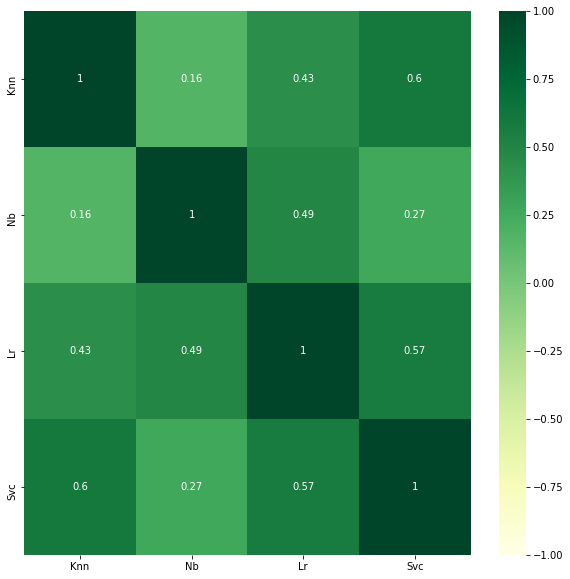

In [223]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(df_pred.corr(method='spearman'), 
         vmin=-1, vmax=1,annot=True,cmap="YlGn",ax=ax)

## Сделайте итоговое предсказание

Решением домашнего задания является данный ноутбук + .csv файл с предсказанием. Пример формата файла, который должен у вас получится приведен в ```data/sample_submission.csv```. Данные для предсказания - ```X_test.csv```.

За лучшее предсказание 5 человек получат +10% к домашке.

Значения предсказаний должны быть целочисленными. Проверка будет точности решения будет по MSE.

In [224]:
# Для jupyter notebook

submission = pd.read_csv('sample_submission.csv', index_col='id')
submission['G3'] = 1 # ваше предсказание
submission.to_csv('submission.csv', index=False) 

In [225]:
X_test_final = pd.read_csv('X_test.csv')
X_test_final

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,MS,M,18,U,GT3,T,4,4,teacher,teacher,...,yes,yes,no,3,2,4,1,4,2,4
1,GP,F,16,U,GT3,A,3,1,services,other,...,yes,yes,no,2,3,3,2,2,4,2
2,MS,F,18,U,GT3,T,4,4,teacher,teacher,...,yes,yes,no,4,3,5,1,2,1,0
3,MS,M,16,R,LE3,A,4,4,at_home,other,...,yes,no,no,5,3,2,1,3,2,5
4,GP,F,15,R,GT3,T,1,1,other,other,...,yes,yes,yes,3,3,4,2,4,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,GP,F,18,R,GT3,T,2,1,other,other,...,no,yes,yes,4,3,5,1,2,3,12
191,GP,M,18,U,GT3,T,2,2,other,at_home,...,no,yes,yes,4,4,3,2,2,1,26
192,GP,F,16,U,GT3,A,2,2,other,other,...,yes,no,no,5,3,4,1,1,5,12
193,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,yes,4,3,2,1,1,4,10


In [226]:
X_test_final = pd.read_csv('X_test.csv')

for feat in ['sex', 'address']:
    for val in X_test_final[feat].unique():
        X_test_final.loc[X_test_final[feat] == val, feat] = (df[X_initial[feat] == val][feat].value_counts().idxmax()).astype('int64')
X_test_final['sex'] = X_test_final['sex'].astype('int')
X_test_final['address'] = X_test_final['address'].astype('int')

In [227]:
svc = svm.SVC(kernel='rbf', C=4)

In [228]:
columns = pd.get_dummies(df).columns
columns = columns.drop('G3')
X_test_final = pd.get_dummies(X_test_final)

In [229]:
X_test_final = X_test_final[columns]

In [230]:
train_y = df.G3
train_x = df.drop('G3', axis = 1)

In [231]:
svc.fit(train_x, train_y)

SVC(C=4)

In [232]:
prediction_result = pd.DataFrame(svc.predict(X_test_final), columns = ['G3'])
prediction_result

,G3
0,11
1,11
2,13
3,13
4,11
...,...
190,10
191,10
192,11
193,11


In [233]:
prediction_result.to_csv('prediction_result.csv') 

In [234]:
X_test_final.shape

(195, 43)